In [1]:
import cv2
import matplotlib.pyplot as plt

# load frozen graph and config file

In [60]:
config_file = r"C:\Users\Tokemi\Desktop\opencv\frozen_models\unmonitored_dogs_frozen_graph.pbtxt"
frozen_model = r"C:\Users\Tokemi\Desktop\opencv\frozen_models\unmonitored_dogs_frozen_graph.pb"

# transform and optimize graph for inference

In [61]:
import tensorflow.compat.v1 as tf
tf.disable_v2_behavior()

In [67]:
import tensorflow as tf
from tensorflow.python.tools import optimize_for_inference_lib
#from tensorflow.tools.graph_transforms import TransformGraph

with tf.io.gfile.GFile(frozen_model, 'rb') as f:
    graph_def = tf.compat.v1.GraphDef()
    graph_def.ParseFromString(f.read())
    graph_def = optimize_for_inference_lib.optimize_for_inference(graph_def, ['x'], ['Identity'], tf.float32.as_datatype_enum)
    #graph_def = tfx.v1.types.standard_artifacts.TransformGraph(graph_def, ['module_apply_default/hub_input/Sub'], ['Identity'], ['remove_nodes(op=PlaceholderWithDefault)', 'strip_unused_nodes(type=float, shape=\"1,224,224,3\")', 'sort_by_execution_order'])

    with tf.io.gfile.GFile(r"C:\Users\John Taiwo\Desktop\opencv\frozen_models\ud_opt_inference_graph.pb", 'wb') as f:
        f.write(graph_def.SerializeToString())

op: "Identity"
input: "model/conv1/Conv2D/ReadVariableOp/resource"
attr {
  key: "T"
  value {
    type: DT_FLOAT
  }
}
 instead. Maybe because freeze_graph wasn't run first?
op: "Identity"
input: "model/conv_dw_1/depthwise/ReadVariableOp/resource"
attr {
  key: "T"
  value {
    type: DT_FLOAT
  }
}
 instead. Maybe because freeze_graph wasn't run first?
op: "Identity"
input: "model/conv_pw_1/Conv2D/ReadVariableOp/resource"
attr {
  key: "T"
  value {
    type: DT_FLOAT
  }
}
 instead. Maybe because freeze_graph wasn't run first?
op: "Identity"
input: "model/conv_dw_2/depthwise/ReadVariableOp/resource"
attr {
  key: "T"
  value {
    type: DT_FLOAT
  }
}
 instead. Maybe because freeze_graph wasn't run first?
op: "Identity"
input: "model/conv_pw_2/Conv2D/ReadVariableOp/resource"
attr {
  key: "T"
  value {
    type: DT_FLOAT
  }
}
 instead. Maybe because freeze_graph wasn't run first?
op: "Identity"
input: "model/conv_dw_3/depthwise/ReadVariableOp/resource"
attr {
  key: "T"
  value {
 

op: "Identity"
input: "model/conv_pw_13/Conv2D/ReadVariableOp/resource"
attr {
  key: "T"
  value {
    type: DT_FLOAT
  }
}
 instead. Maybe because freeze_graph wasn't run first?


In [59]:
#save optimized graph
frozen_model = r"C:\Users\Tokemi\Desktop\opencv\frozen_models\ud_opt_inference_graph.pb"

# load frozen graph and config with opencv for object detecton

In [68]:
model = cv2.dnn_DetectionModel(frozen_model, config_file)

In [ ]:
#get class labels

In [69]:
ClassLabels = []
file_name = r"C:\Users\Tokemi\Desktop\opencv\labels.txt"
with open(file_name,'rt') as fpt:
    classLabels = fpt.read().rstrip('\n').split('\n')

In [70]:
print(classLabels)

['looselyChained', 'tightlyChained', 'unchained']


In [71]:
model.setInputSize(320,320)
model.setInputScale(1.0/127.5) # 255/2 = 127.5
model.setInputMean((127.5,127.5,127.5)) # mobilenet => [-1, 1]
model.setInputSwapRB(True)


<dnn_Model 000001EE23876630>

# object detection in image

In [72]:
img = cv2.imread(r"C:\Users\Tokemi\Desktop\opencv\loosely_chained_dog1.jpg")

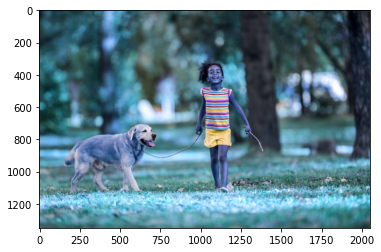

In [73]:
plt.imshow(img)

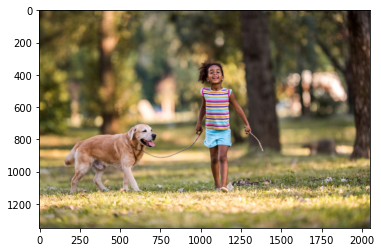

In [74]:
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))

In [75]:
ClassIndex, confidence, bbox = model.detect(img,confThreshold = 0.5)

error: OpenCV(4.5.5) D:\a\opencv-python\opencv-python\opencv\modules\dnn\src\model.cpp:549: error: (-213:The function/feature is not implemented) Unknown output layer type: "Softmax" in function 'cv::dnn::dnn4_v20211220::DetectionModel::detect'


In [75]:
print(ClassIndex)

NameError: name 'ClassIndex' is not defined

In [42]:
font_scale = 3
font = cv2.FONT_HERSHEY_PLAIN
for ClassInd, conf, boxes in zip(ClassIndex.flatten(), confidence.flatten(),bbox):
    cv2.rectangle(img,boxes,(255,0,0), 2)
    cv2.putText(img, classLabels[ClassInd-1], (boxes[0]+10, boxes[1]+40), font, fontScale = font_scale, color = (0, 255, 0), thickness = 3)

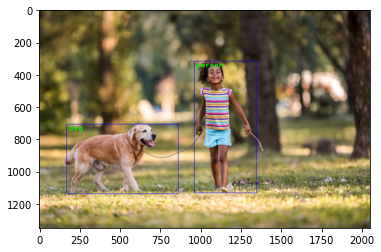

In [43]:
 plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))

# object detection in video

In [44]:
cap = cv2.VideoCapture(r"C:\Users\Tokemi\Desktop\opencv\dog_vid.mp4")

#check if video is opened correctly
if not cap.isOpened():
    cap = cv2.VideoCapture(0)
if not cap.isOpened():
    raise IOError('cannot open video')
    
font_scale = 3
font = cv2.FONT_HERSHEY_PLAIN

while True:
    ret, frame = cap.read()
    
    ClassIndex, confidence, bbox = model.detect(frame, confThreshold=0.6)
    
    print(ClassIndex)
    if (len(ClassIndex)!= 0):
        for ClassInd, conf, boxes in zip(ClassIndex.flatten(), confidence.flatten(),bbox):
            if (ClassInd<=80):
                cv2.rectangle(frame,boxes,(255,0,0), 2)
                cv2.putText(frame, classLabels[ClassInd-1], (boxes[0]+10, boxes[1]+40), font, fontScale = font_scale, color = (0, 255, 0), thickness = 3)
    
    cv2.imshow('Realtime Object Detection', frame)
    
    if cv2.waitKey(2) & 0xFF == ord('q'):
        break

cap.release()
cv2.destroyAllWindows()
    

[1]
[1]
[1]
[1]
[1]
[1]
()
()
[1]
[1 1]
[1 1]
[1 1]
[1 1]
[1 1]
[1 1]
[1 1]
[1 1]
[1 1]
[1 1]
[1 1]
[1 1]
[1 1]
[1 1]
[1 1]
[1 1]
[1 1]
[1 1]
[1 3]
[1]
[1 1]
[1 1]
[1 1]
[1 1]
[1 1]
[1 1]
[1 1 1]
[1 1 1]
[1]
[1]
[1 1]
[1 1]
[1 1]
[1 1]
[1]
[1]
[1 1]
[1 1]
[1 1]
[1]
[1 1]
[1 1]
[1 1]
[1 1]
[1 1]
[1 1]
[1]
[1 1]
[1 1]
[1 1]
[1]
[1 1]
[1 1]
[1]
[1]
[1 1]
[1]
[1 1]
[1 1]
[1 1]
[ 1 18]
[1 1]
[1]
[1 1]
[1]
[1]
[1 3]
[1]
[1]
[1]
[1]
[1]
()
[1]
[1]
[1 1]
[1 1]
[ 1  1 18]
[ 1  1 18]
[1 1]
[1 1]
[1 1]
[1 1]
[1 1]
[1]
[1]
[1 1]
[1 1]
[1 1]
[ 1 28]
[ 1 28  1  1]
[ 1 28  1]
[ 1 28]
[ 1 28]
[ 1 28]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1 1]
[1]
[1]
[1 1]
[1]
[1]
[1]
[1]
[1]
[1 1]
[1]
[1 1]
[ 1 28  1]
[1]
[1 1]
[1]
[1]
[1 1]
[1 1 1]
[ 1 18]
[1 1 1]
[1]
[1 1 1]
[ 1 28]
[ 1 28]
[1 1]
[1 1]
[1 1 1]
[1 1]
[1 1]
[1]
[ 1 28]
[1]
[1 1]
[ 1 28]
[ 1 28]
[ 1 28]
[ 1 28]
[1]
[1]
[1]
[1]
[1]
[1]
[1 1]
[1 1]
[1 1]
[1]
[1]
[1]
[1]
[1 1]
[1 1]
[1 1]
[1 1]
[1 1]
[1]
[1 1]
[1 1]
[1 1]
[1 1]
[1 1]
[1 1]
[1 1]
[1 1]
[1 1]
[1 1]

error: OpenCV(4.5.5) D:\a\opencv-python\opencv-python\opencv\modules\imgproc\src\resize.cpp:4052: error: (-215:Assertion failed) !ssize.empty() in function 'cv::resize'
